In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
#lib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#read data set
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [13]:
# split data into traning and testing
# train_test_split
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
y=df['Price']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [14]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info=mutual_info_regression(X_train.fillna(0),y_train)
mutual_info

array([0.27658519, 0.13355605, 0.07945685, 0.01170469, 0.10395499])

In [15]:
mutual_info_series=pd.Series(mutual_info)
mutual_info_series.index=X_train.columns
mutual_info_series

Avg. Area Income                0.276585
Avg. Area House Age             0.133556
Avg. Area Number of Rooms       0.079457
Avg. Area Number of Bedrooms    0.011705
Area Population                 0.103955
dtype: float64

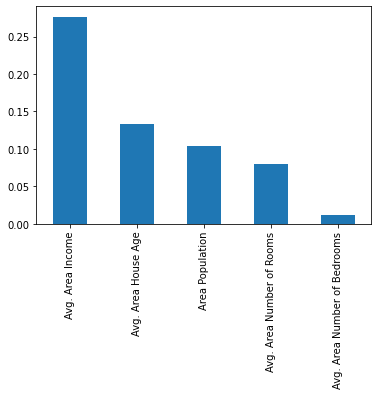

In [16]:
mutual_info_series.sort_values(ascending=False).plot.bar()

In [17]:
from sklearn.feature_selection import SelectPercentile
# selecting the top 20 percentile
selected_top_columns=SelectPercentile(mutual_info_regression,percentile=65)
selected_top_columns.fit(X_train,y_train)
X_train.columns[selected_top_columns.get_support()]

Index(['Avg. Area Income', 'Avg. Area House Age', 'Area Population'], dtype='object')